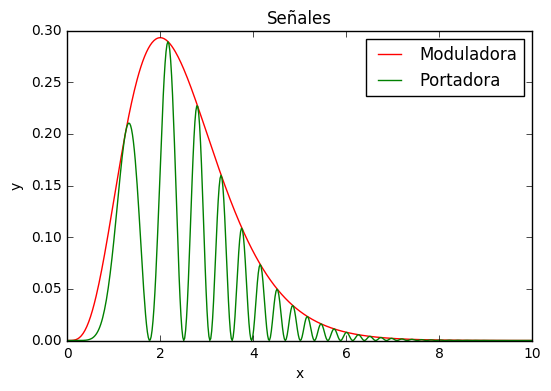

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)

y1 = (x**4)*np.exp(-2*x)
y2 = ((x**2)*np.exp(-x)*np.sin(x**2))**2

plt.plot(x,y1,'r-',label='Moduladora')
plt.plot(x,y2,'g-',label='Portadora')
plt.title('Señales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()